# 1. Import Libraries

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)

warnings.filterwarnings("ignore")

np.random.seed(123)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# 2. Read Data

In [2]:
data = pd.read_csv("plant_disease_dataset.csv")

data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_12279,pixel_12280,pixel_12281,pixel_12282,pixel_12283,pixel_12284,pixel_12285,pixel_12286,pixel_12287,label
0,114.0,179.0,99.0,116.0,180.0,90.0,112.0,183.0,80.0,127.0,...,94.0,150.0,58.0,155.0,194.0,112.0,175.0,217.0,119.0,healthy
1,68.0,88.0,46.0,134.0,159.0,111.0,166.0,195.0,144.0,121.0,...,119.0,152.0,86.0,126.0,158.0,101.0,129.0,163.0,132.0,healthy
2,39.0,82.0,23.0,80.0,119.0,36.0,119.0,145.0,77.0,98.0,...,29.0,54.0,17.0,111.0,129.0,81.0,116.0,130.0,77.0,healthy
3,91.0,122.0,42.0,41.0,59.0,20.0,33.0,45.0,16.0,50.0,...,136.0,181.0,113.0,115.0,165.0,94.0,90.0,146.0,69.0,healthy
4,39.0,83.0,46.0,39.0,84.0,47.0,37.0,79.0,43.0,38.0,...,88.0,143.0,97.0,83.0,134.0,85.0,105.0,148.0,106.0,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,163.0,110.0,117.0,141.0,133.0,119.0,118.0,139.0,121.0,135.0,...,163.0,177.0,200.0,172.0,175.0,187.0,171.0,171.0,181.0,rust
917,236.0,252.0,212.0,221.0,244.0,195.0,232.0,249.0,206.0,243.0,...,119.0,147.0,106.0,112.0,144.0,103.0,121.0,152.0,112.0,rust
918,41.0,78.0,27.0,54.0,98.0,35.0,49.0,91.0,35.0,46.0,...,138.0,168.0,124.0,146.0,158.0,129.0,137.0,161.0,114.0,rust
919,175.0,150.0,126.0,186.0,162.0,137.0,187.0,163.0,138.0,177.0,...,186.0,223.0,138.0,186.0,222.0,145.0,177.0,218.0,131.0,rust


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Columns: 12289 entries, pixel_0 to label
dtypes: float64(12288), object(1)
memory usage: 86.4+ MB


### 3.1.2. Remove Missing Values

In [4]:
# no NaN to remove
# data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_12278,pixel_12279,pixel_12280,pixel_12281,pixel_12282,pixel_12283,pixel_12284,pixel_12285,pixel_12286,pixel_12287
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,...,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,119.376764,145.420195,101.475570,119.030402,145.839305,101.428882,118.775244,145.965255,100.831705,119.912052,...,94.056460,112.555917,137.952226,93.427796,111.946797,136.919653,92.795874,111.003257,135.596091,91.625407
std,53.608487,49.882039,54.545849,52.458505,49.167485,54.512898,52.346322,48.766312,55.474406,52.317798,...,47.221323,49.642739,45.366765,48.270743,50.850039,46.746728,48.703312,51.269397,47.561399,48.026915
min,16.000000,19.000000,2.000000,16.000000,21.000000,3.000000,15.000000,23.000000,4.000000,11.000000,...,7.000000,0.000000,3.000000,0.000000,3.000000,4.000000,2.000000,5.000000,7.000000,3.000000
25%,79.000000,113.000000,61.000000,82.000000,115.000000,61.000000,81.000000,114.000000,60.000000,81.000000,...,58.000000,74.000000,109.000000,57.000000,73.000000,107.000000,55.000000,72.000000,105.000000,54.000000
50%,112.000000,143.000000,95.000000,113.000000,145.000000,94.000000,113.000000,145.000000,93.000000,116.000000,...,90.000000,109.000000,136.000000,89.000000,109.000000,135.000000,88.000000,105.000000,132.000000,86.000000
75%,151.000000,177.000000,134.000000,150.000000,176.000000,132.000000,148.000000,176.000000,133.000000,151.000000,...,121.000000,140.000000,166.000000,121.000000,142.000000,166.000000,121.000000,143.000000,166.000000,121.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


### 3.2.2. Remove Outliers

In [6]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [7]:
target_name = "label"
feature_name = list(data.columns.drop(target_name))

In [8]:
X = data[feature_name].astype(int)
y = data[target_name]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

<AxesSubplot:>

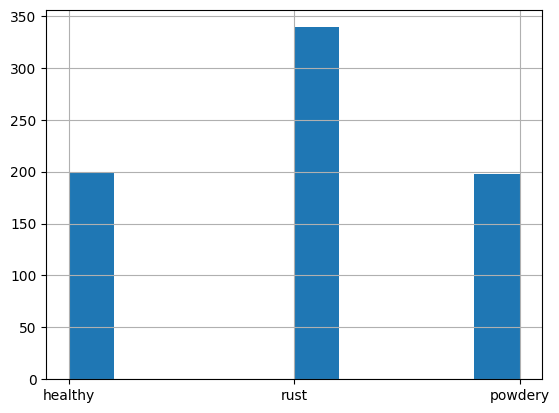

In [10]:
y_train.hist()

<AxesSubplot:>

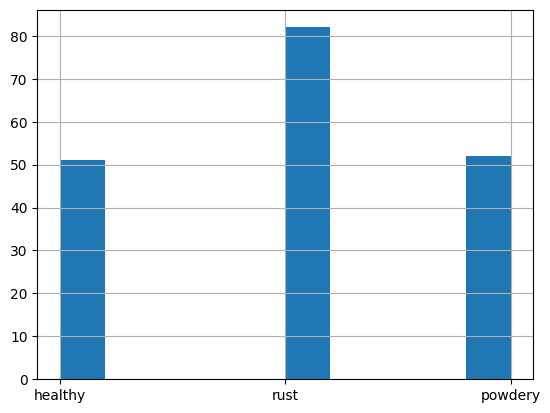

In [11]:
y_test.hist()

# 5. Data Preparation

## ### 5.1. Ordinal Encoding

## ### 5.2. One Hot Encoding

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [12]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [13]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [14]:
clf = MLPClassifier(
    hidden_layer_sizes=(60),
    activation="relu",
    learning_rate_init=0.0001,
    max_iter=1800,
    batch_size=X_train_scaled.shape[0],
)

## 6.2. Train Model

In [15]:
clf.fit(X_train_scaled, y_train)

MLPClassifier(batch_size=736, hidden_layer_sizes=60, learning_rate_init=0.0001,
              max_iter=1800)

## 6.3. Loss Curve

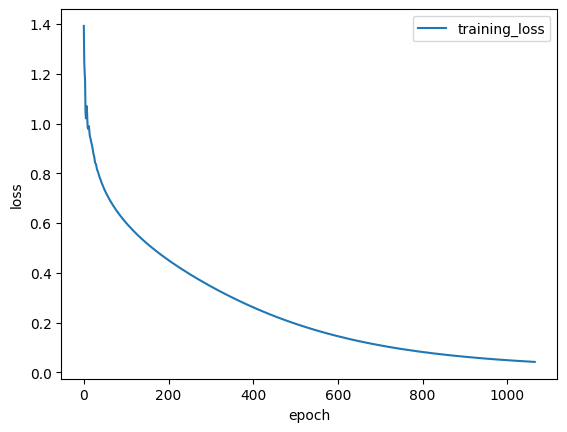

In [16]:
plt.plot(clf.loss_curve_, label="training_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

## 6.4. Model's Weight & Bias

In [17]:
for coef_ in clf.coefs_:
    print(coef_.shape)

(12288, 60)
(60, 3)


In [18]:
for intercept_ in clf.intercepts_:
    print(intercept_.shape)

(60,)
(3,)


# 7. Prediction

## 7.1. Training Set

In [19]:
y_pred_train = clf.predict(X_train_scaled)

## 7.2. Test Set

In [20]:
y_pred_test = clf.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

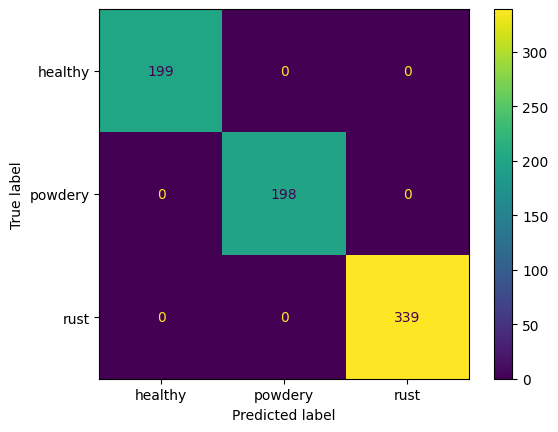

In [21]:
plot_confusion_matrix(clf, X_train_scaled, y_train)

### 8.1.2. Scoring

In [22]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [23]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
healthy,1.0,1.0,1.0,199.0
powdery,1.0,1.0,1.0,198.0
rust,1.0,1.0,1.0,339.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,736.0
weighted avg,1.0,1.0,1.0,736.0


## 8.2. Test Set

### 8.2.1. Confusion Matrix

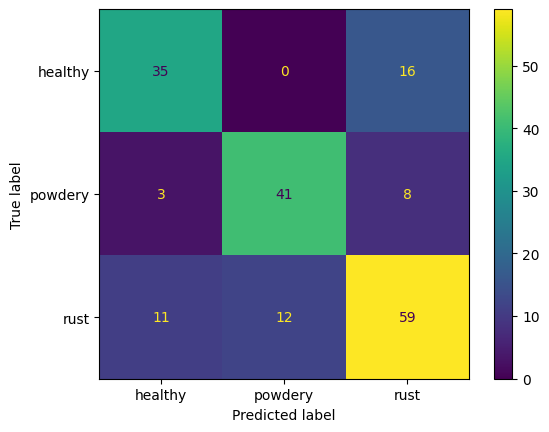

In [24]:
plot_confusion_matrix(clf, X_test_scaled, y_test)

### 8.2.2. Scoring

In [25]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [26]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
healthy,0.714286,0.686275,0.700000,51.00000
powdery,0.773585,0.788462,0.780952,52.00000
rust,0.710843,0.719512,0.715152,82.00000
accuracy,0.729730,0.729730,0.729730,0.72973
macro avg,0.732905,0.731416,0.732035,185.00000
weighted avg,0.729428,0.729730,0.729470,185.00000


# 9. Save Model

In [27]:
import pickle

In [28]:
pickle.dump((clf, scaler), open("plant_disease.pickle", "wb"))